In [2]:
import seaborn as sns
import pylab as plt
from datetime import datetime
import pandas as pd
%matplotlib inline

# Exercise 1: Think about the data

- Who is the audience?
- What is the main message? 

## Read data

In [3]:
#Pandas doesn't detect the format correctly, doing it manually
parser = lambda date: datetime.strptime(date, '%d/%m/%Y')

#Read data
df = pd.read_excel("data/data-1.xlsx",parse_dates=["dateRep"], date_parser=parser)

#Print head
df.head()

,dateRep,year,month,day,cases,deaths,countriesAndTerritories,geoId,popData2020,countryterritoryCode,continentExp
0,2022-02-14,2022,2,14,23456.0,11.0,Austria,AT,8901064,AUT,Europe
1,2022-02-13,2022,2,13,24529.0,11.0,Austria,AT,8901064,AUT,Europe
2,2022-02-12,2022,2,12,25358.0,25.0,Austria,AT,8901064,AUT,Europe
3,2022-02-11,2022,2,11,30228.0,25.0,Austria,AT,8901064,AUT,Europe
4,2022-02-10,2022,2,10,33477.0,18.0,Austria,AT,8901064,AUT,Europe


# Exercise 2: Visualize
- Use your message to map your data to the different channels (x, y, color, etc), using one chart (scatter, line, etc)

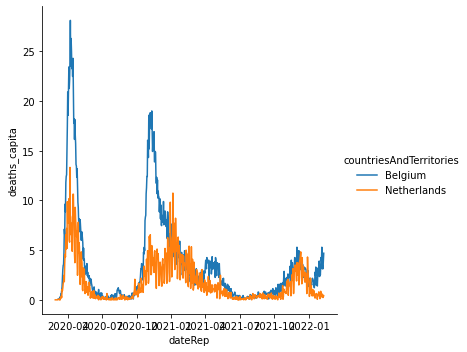

In [4]:
#Message: The last lockdown may have contributed to having less deaths than Belgium
#Mapping: x --> time, y --> deaths per capita, color --> country

#Calculating deaths per capita
df["deaths_capita"] = 1E6*df["deaths"]/df["popData2020"]


#Keeping only two countries
df = df.loc[df["geoId"].isin(["NL","BE"])]
df = df.loc[df["dateRep"]<"2022-02-10"] #the last few days may have incomplete information

#Visualizing as a line plot
g = sns.relplot(x="dateRep", y="deaths_capita", data=df, kind="line", hue="countriesAndTerritories")

# Exercise 3 Declutter and emphasize
- Improve the aesthetics of the plot by decluttering it, and emphasizing the important elements

In [5]:
#Change the default options of visualization
text_color = "#404040"
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "axes.spines.bottom": False,
                "lines.linewidth": 2, "grid.color": "lightgray", "legend.frameon": False,
                 "xtick.labelcolor": text_color, "ytick.labelcolor": text_color, "xtick.color": text_color, "ytick.color": text_color,"text.color": text_color,
                "axes.labelcolor": text_color, "axes.titlecolor":text_color,"figure.figsize": [5,3],
                "axes.titlelocation":"left","xaxis.labellocation":"left","yaxis.labellocation":"bottom"}

sns.set_theme(context='paper', style='white',font='Verdana', 
              font_scale=1.3, color_codes=True, rc=custom_params)

Text(0, 0, 'Deaths per capita')

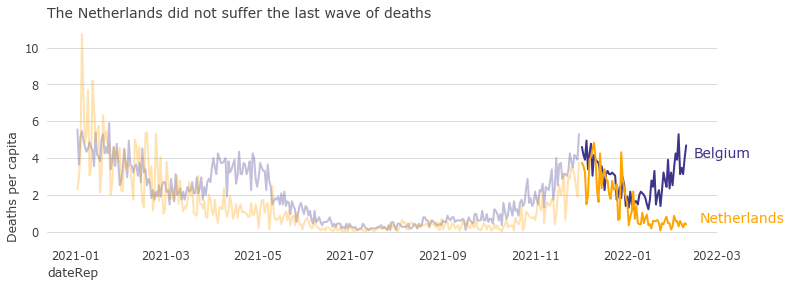

In [11]:
#Create figure
plt.figure(figsize=(12,4))

#Data before 2022 (lineplot plots in the current figure, relplot creates a new one)
sns.lineplot(x="dateRep", y="deaths_capita", data=df.loc[(df["dateRep"]>"2021")&(df["dateRep"]<"2021-12")],  hue="countriesAndTerritories", 
            palette={"Netherlands":"#ffa50050", "Belgium": "#3d348b50"}, legend=None)


#Data after 2022
g = sns.lineplot(x="dateRep", y="deaths_capita", data=df.loc[df["dateRep"]>"2021-12"], hue="countriesAndTerritories", 
            palette={"Netherlands":"orange", "Belgium": "#3d348b"}, legend=None)


#Label directly
plt.text(parser("14/02/2022"),4,"Belgium",color="#3d348b",fontsize=14, ha="left")
plt.text(parser("18/02/2022"),0.5,"Netherlands",color="orange",fontsize=14, ha="left")

#Add grid lines (horizontally)
plt.gca().grid(axis="y")

#Remove bottom and left grid
sns.despine(left=True, bottom=True)

#Create title
plt.title("The Netherlands did not suffer the last wave of deaths",fontsize=14)

#Add labels
plt.ylabel("Deaths per capita")


# Exercise 4 Storytelling
How would you create an engaging story?
- Exposition:
- Middle/Conflict:
- Resolution:

In [ ]:
#I'd add some information about the lockdowns. 
## Exposition: Explaining the symbol for lockdown and colors on top, 
## Middle: Drawing the attention to the most important part, then to the context
## Resolution: Maybe "the lockdown in the NLD was effective while the one in BEL not"

# Example plotly 
I'm not including the API keys or the data, just as an example

In [18]:
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly
import pandas as pd
import math


#You need an account here: https://plotly.com/python/basic-charts/
username = '' # your username
api_key = '' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)


[(0.23921568627450981, 0.20392156862745098, 0.5450980392156862),
 (0.9019607843137255, 0.6862745098039216, 0.1803921568627451),
 (0.09803921568627451, 0.09019607843137255, 0.08627450980392157),
 (0.8784313725490196, 0.8862745098039215, 0.8588235294117647)]

In [19]:
#data is a pandas dataframe contanining information at the country level

## Create hover text and define size of the bubbles (not needed usually)
hover_text = []
bubble_size = []


for index, row in data.iterrows():
    hover_text.append(('Country: {}<br>'+
                      'Effective tax rate: {:.2%}<br>'+
                      'Profit per employee: ${:,.0f}<br>'+
                      'Profits: ${:,.0f}M<br>'+
                      'GDP per capita: ${:,.0f}<br>'+
                      'Population: {:,}<br>'+
                      'Corporate income tax rate: {:.2%} <extra></extra>').format(row["Country"],
                                             row["etr"],
                                             row["Profit per employee"],
                                             row["us_irs_pos_pi"]/1E6,
                                             row["gdppc"],
                                             row["POP_int"],
                                             row["cit"]
                                            ))
    
    
    bubble_size.append(math.sqrt(row['us_irs_pos_pi']))

data['text'] = hover_text
data['size'] = bubble_size
sizeref = 8.*max(data.loc[data["iso3"]!="USA",'size']**2)/(100**2)




# Create figure
fig = go.Figure()
#Colors to be used
colors = ["tomato","#50805E"]#px.colors.qualitative.T10


## Create scatterplot by group (to have different colors)
for continent_name, continent in data.groupby("low_etr",sort=True):
    fig.add_trace(
        go.Scatter(
            y=continent['Effective tax rate (%)'],  #y variable
            x=continent['Profit per employee'],   #x variable
            name=continent_name, # group name
            text=continent["iso3"], #country
            hovertemplate=continent['text'], #text for hovering created above 
            marker_size=continent['size']**2, #size
            marker_color=colors.pop(0) #color
            )
    )

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))


## Add titles
fig.update_layout(
    title='Multinational corporations book the majority of profits in tax havens',
    yaxis=dict(
        title='Effective tax rate (%)',
        gridcolor='white',
        
        gridwidth=2,
    ),
    xaxis=dict(
        title='Profit per employee',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(255,246,227)', #color of tjn (not needed)
    plot_bgcolor='rgb(255,246,227)',
    legend=dict(
        orientation="v",
        x=0.05, 
        y=1,
        itemclick="toggle"),
    font=dict(
        family="Verdana",
        size=14,
        color="gray"
    )
)





# Save locally
# plotly.offline.plot(fig, filename='scatter.html')
fig.show()

#Save to plotly cloud
# py.plot(fig, filename = 'scatter_irs_us_2017', auto_open=True)

 

